<a href="https://colab.research.google.com/github/JribiKaouthar/alzheimer-early-detection/blob/main/ProjetDataMiningD%C3%A9tectionPr%C3%A9coceAlzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nom et prénom: Kaouthar JRIBI

Classe: 2ème années D

# ***La détection précoce de la maladie d'Alzheimer***

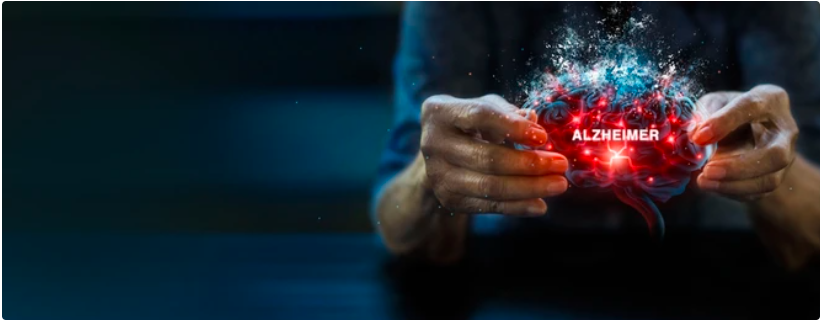

## ***Introduction***

La maladie d'Alzheimer représente une forme de démence neurodégénérative touchant le tissu cérébral, demeurant à ce jour incurable et se manifestant par une perte graduelle et irréversible des capacités mentales, notamment de la mémoire. Selon l'Organisation mondiale de la santé (OMS) en 2023, elle affecte plus de 55 millions de personnes à l'échelle mondiale, avec près de 10 millions de nouveaux cas diagnostiqués chaque année. Cette maladie se positionne ainsi comme la cause la plus fréquente de démence chez l'être humain.

La détection précoce de la maladie d'Alzheimer revêt une importance cruciale, étant donné l'absence actuelle de traitement curatif. Dans ce contexte, les outils de Machine Learning jouent un rôle essentiel en permettant de développer des modèles prédictifs basés sur des données cliniques et biologiques. Ces modèles peuvent aider à identifier les individus présentant un risque accru de développer la maladie, ce qui ouvre des perspectives prometteuses en termes de prise en charge précoce et de développement de thérapies préventives.

Dans le cadre de notre cursus de "data mining" à l'École Supérieure de la Statistique et de l'Analyse de l'Information, nous avons choisi de nous pencher sur ce sujet pour plusieurs raisons. Tout d'abord, il s'agit d'un domaine d'étude profondément captivant, offrant des résultats susceptibles d'avoir un impact significatif sur la santé publique. De plus, l'abondance de données disponibles dans ce domaine offre une opportunité idéale pour mettre en pratique les compétences acquises au sein de notre établissement, en combinant expertise statistique et techniques avancées d'analyse de données pour contribuer à la lutte contre cette maladie dévastatrice.


## ***Plan***

1. Choix des données
2. Préparation des données
3. Sélection des variables
4. Tuning des modèles
5. Validation et interprétation des résultats





## ***1. Choix des données***

Pour ce projet, on a choisi de travailler avec des données IRM provenant du projet Open Access Series of Imaging Studies (OASIS), disponibles à la fois sur leur site Web et sur Kaggle. Ces données sont particulièrement pertinentes car elles sont utilisables pour former des modèles d'apprentissage automatique dans le but spécifique d'identifier les patients souffrant de démences légères à modérées. L'ensemble de données longitudinal IRM comprend des informations de 373 sujets âgés de 60 à 96 ans. Chaque sujet a subi au moins un scan IRM, et tous sont droitiers. Parmi ces sujets, certains ont été classés comme "non déments" tout au long de l'étude, certains comme "déments" dès leur première visite et sont restés ainsi, tandis que d'autres ont évolué de "non déments" à "déments" lors de visites ultérieures, étant ainsi classés comme "Convertis". Ces données offrent une base solide pour notre analyse et nous permettront d'explorer de manière approfondie les facteurs associés à la progression des démences légères à modérées chez les sujets étudiés.
La variable à expliquer durant ce projet sera "***Group***"

In [ ]:
import pandas as pd
df = pd.read_excel('/DetectionPrécoceAlzheimerDonnées.xlsx')

## ***2. Préparation des données***

### ***2.a Exploration des données***

Dans cette section, nous nous sommes concentrés sur l'exploration de la relation entre chaque caractéristique des tests IRM et la démence du patient. Nous avons effectué cette analyse exploratoire des données pour établir clairement la relation entre les données à travers des graphiques, afin de pouvoir présumer les corrélations avant l'extraction ou l'analyse des données. Cela pourrait nous aider à comprendre la nature des données et à sélectionner la méthode d'analyse appropriée pour le modèle ultérieurement.

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


***Description des colonnes***

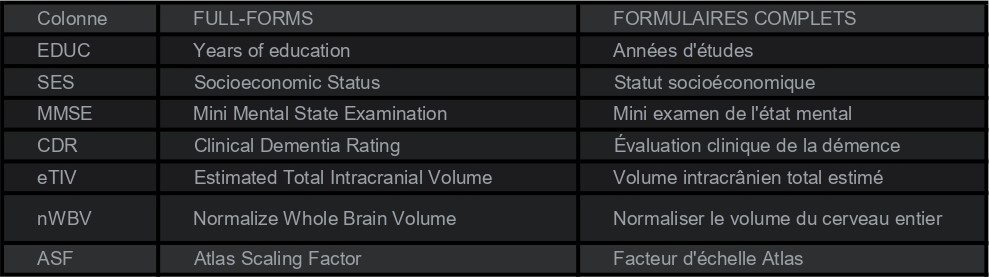

***Une explication brève de ces variables :***

* Années d'études : Cela fait référence au nombre d'années que la personne a passées à l'école ou à poursuivre des études formelles. C'est souvent utilisé comme un indicateur de niveau d'éducation.
* Statut socioéconomique (SSE) : Cela indique la position d'une personne dans la société en termes de revenu, d'éducation, de profession, etc. C'est un facteur important qui peut influencer la santé et d'autres aspects de la vie.
* Mini-examen de l'état mental (MMSE) : C'est un test qui évalue divers aspects de la cognition, tels que la mémoire, l'attention et la capacité de raisonnement. Il est souvent utilisé pour détecter les troubles cognitifs, y compris la démence.
* Évaluation clinique de la démence (CDR) : C'est une évaluation clinique qui mesure le degré de démence chez un individu. Elle comprend plusieurs sous-échelles pour évaluer différents aspects de la cognition et du fonctionnement quotidien.
* Volume intracrânien total estimé (eTIV) : C'est une mesure du volume total à l'intérieur du crâne, y compris le cerveau, le liquide céphalorachidien et d'autres structures.
* Normaliser le volume du cerveau entier (nWBV) : Cela fait référence au volume total du cerveau par rapport à d'autres mesures, telles que la taille de la tête ou du crâne. Cela permet de tenir compte des variations de taille du cerveau entre les individus.
* Facteur d'échelle Atlas (ASF) : C'est un facteur utilisé pour ajuster les images IRM afin de les mettre à l'échelle correcte pour une comparaison précise entre différents sujets ou groupes.


Ces variables sont souvent utilisées dans les études sur la démence pour évaluer les facteurs associés à la maladie, comprendre son évolution et aider à la prise de décision clinique.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Sélectionner uniquement les colonnes numériques
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculer le minimum et le maximum de chaque colonne numérique
min_max_values = numerical_columns.aggregate([min, max])

# Afficher le tableau des valeurs min et max
print(min_max_values)


     Visit  MR Delay  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
min      1         0   60     6  1.0   4.0  0.0  1106  0.644  0.876
max      5      2639   98    23  5.0  30.0  2.0  2004  0.837  1.587


In [ ]:
# Par souci de simplification, on va s'intéresser qu'à la première visite
df = df.loc[df['Visit']==1]

# Réinitialiser l'index après avoir filtré les données de la première visite
df = df.reset_index(drop=True)

# Colonne M/F
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

# Préparation de la variable à expliquer:
#       élimination de 'Converted'
#       transformation en binaire : Non dément = 0, Dément = 1
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])

# Supprimer les colonnes inutiles
df = df.drop(['MRI ID', 'Visit', 'Hand', 'MR Delay','Subject ID'], axis=1)

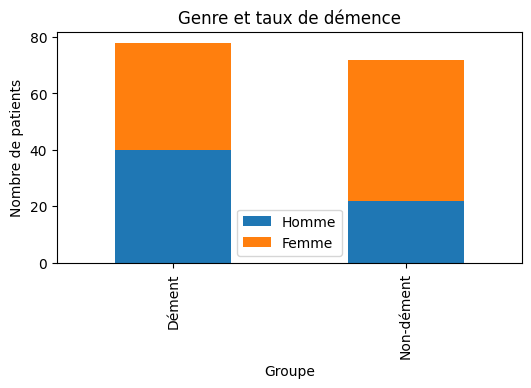

In [ ]:
#Comparaison du genre dans chaque valeur de notre variable à expliquer
Demented = df[df['Group']==1]['M/F'].value_counts()
Nondemented = df[df['Group']==0]['M/F'].value_counts()
df_bar = pd.DataFrame([Demented,Nondemented])
df_bar.index = ['Dément', 'Non-dément']
ax = df_bar.plot(kind='bar', stacked=True, figsize=(6, 3))

# Définir les noms à afficher dans la légende
handles, labels = ax.get_legend_handles_labels()
labels = ['Homme', 'Femme']
ax.legend(handles, labels)

# Ajouter les étiquettes des axes
plt.xlabel('Groupe')
plt.ylabel('Nombre de patients')

# Ajouter le titre au graphique
plt.title('Genre et taux de démence')

# Afficher le graphique
plt.show()

**⇨** Le graphique ci-dessus indique que les hommes sont plus susceptibles de souffrir de démence que les femmes.

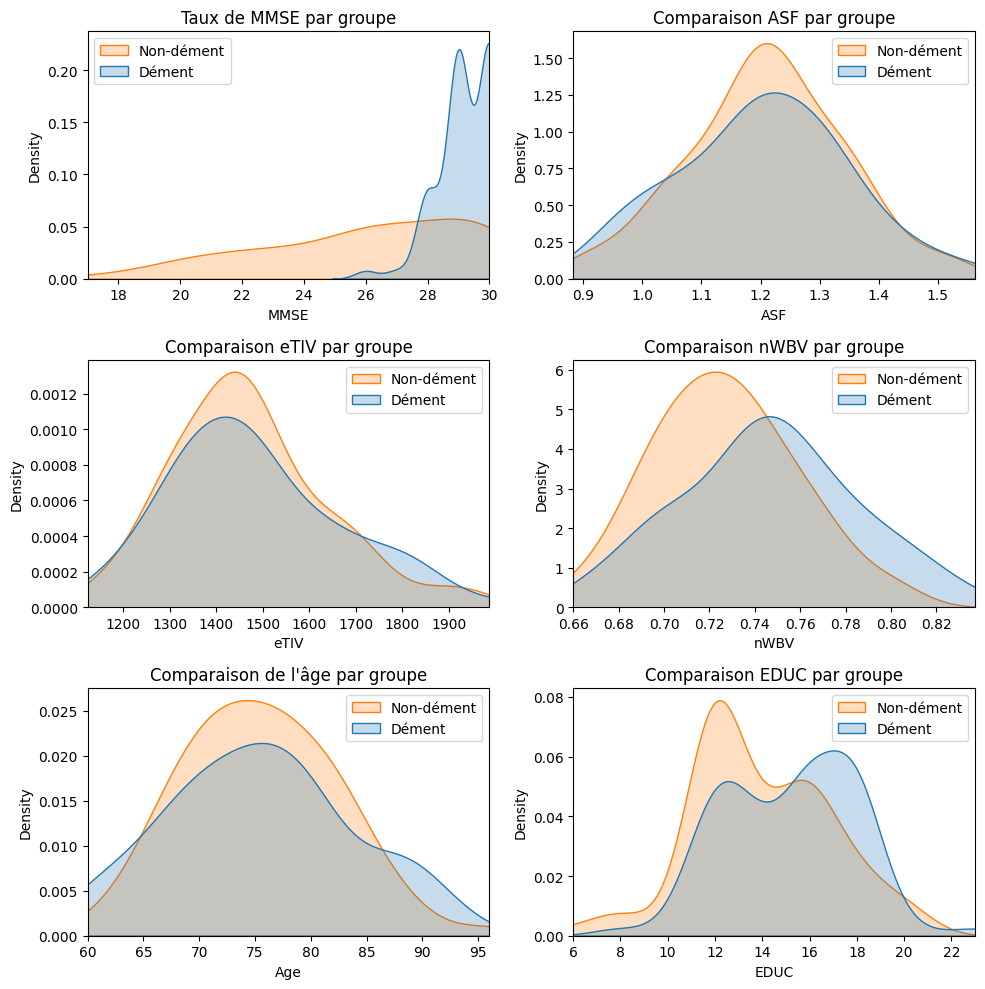

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la grille de facettes pour une matrice de graphiques 3x2
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Graphique 1 : Comparaison du taux de MMSE dans chaque valeur de la variable à expliquer
sns.kdeplot(data=df, x='MMSE', hue='Group', fill=True, ax=axes[0, 0])
axes[0, 0].set_xlim(df['MMSE'].min(), df['MMSE'].max())
axes[0, 0].set_title('Taux de MMSE par groupe')
axes[0, 0].legend(['Non-dément', 'Dément'], loc='upper left')

# Graphique 2 : Comparaison de 'ASF' (Atlas Scaling Factor) entre les groupes
sns.kdeplot(data=df, x='ASF', hue='Group', fill=True, ax=axes[0, 1])
axes[0, 1].set_xlim(df['ASF'].min(), df['ASF'].max())
axes[0, 1].set_title('Comparaison ASF par groupe')
axes[0, 1].legend(['Non-dément', 'Dément'], loc='upper right')

# Graphique 3 : Comparaison de 'eTIV' (Estimated Total Intracranial Volume) entre les groupes
sns.kdeplot(data=df, x='eTIV', hue='Group', fill=True, ax=axes[1, 0])
axes[1, 0].set_xlim(df['eTIV'].min(), df['eTIV'].max())
axes[1, 0].set_title('Comparaison eTIV par groupe')
axes[1, 0].legend(['Non-dément', 'Dément'], loc='upper right')

# Graphique 4 : Comparaison de 'nWBV' (Normalized Whole Brain Volume) entre les groupes
sns.kdeplot(data=df, x='nWBV', hue='Group', fill=True, ax=axes[1, 1])
axes[1, 1].set_xlim(df['nWBV'].min(), df['nWBV'].max())
axes[1, 1].set_title('Comparaison nWBV par groupe')
axes[1, 1].legend(['Non-dément', 'Dément'], loc='upper right')

# Graphique 5 : Comparaison de l'âge entre les groupes
sns.kdeplot(data=df, x='Age', hue='Group', fill=True, ax=axes[2, 0])
axes[2, 0].set_xlim(df['Age'].min(), df['Age'].max())
axes[2, 0].set_title('Comparaison de l\'âge par groupe')
axes[2, 0].legend(['Non-dément', 'Dément'], loc='upper right')

# Graphique 6 : Comparaison de 'EDUC'  entre les groupes
sns.kdeplot(data=df, x='EDUC', hue='Group', fill=True, ax=axes[2, 1])
axes[2, 1].set_xlim(df['EDUC'].min(), df['EDUC'].max())
axes[2, 1].set_title('Comparaison EDUC par groupe')
axes[2, 1].legend(['Non-dément', 'Dément'], loc='upper right')

# Réglage de l'espacement entre les graphiques
plt.tight_layout()


# Afficher la matrice de graphiques
plt.show()


Ce code utilise Seaborn pour créer un KDE plot (Kernel Density Estimate plot) qui représente la distribution des variablles exlicatives: 'MMSE', 'ASF', 'eTIV', 'nWBV', 'Age' et 'EDUC' en fonction des groupes ('Group'). Les teintes différentes dans le graphique représentent les deux groupes : les patients non déments (0) et les patients déments (1).

**⇨** Le graphique ci-dessus montre les résultats suivants:

* Il y a une concentration plus élevée de patients âgés de 70 à 80 ans dans le groupe de patients déments que dans le groupe des patients non déments.
* Le groupe non dément présente un ratio de volume cérébral plus élevé que le groupe dément.
* Le graphique montre que le groupe non dément a des scores MMSE beaucoup plus élevés que le groupe dément.
* Les patients déments étaient moins éduqués en termes d'années d'études.



In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   150 non-null    int64  
 1   M/F     150 non-null    int64  
 2   Age     150 non-null    int64  
 3   EDUC    150 non-null    int64  
 4   SES     142 non-null    float64
 5   MMSE    150 non-null    float64
 6   CDR     150 non-null    float64
 7   eTIV    150 non-null    int64  
 8   nWBV    150 non-null    float64
 9   ASF     150 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 11.8 KB


***2.b. Prétraitement des données***


Nous avons identifié 8 lignes avec des valeurs manquantes dans la colonne SES. Nous pouvons traiter ce problème avec deux approches. La première consiste simplement à supprimer les lignes avec des valeurs manquantes. L'autre approche consiste à remplacer les valeurs manquantes par les valeurs correspondantes, également connue sous le nom d'« imputation ». Étant donné que nous n'avons que 150 données, je suppose que l'imputation aiderait les performances de notre modèle.

In [ ]:
# Vérifier les valeurs manquantes par colonne
pd.isnull(df).sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      8
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

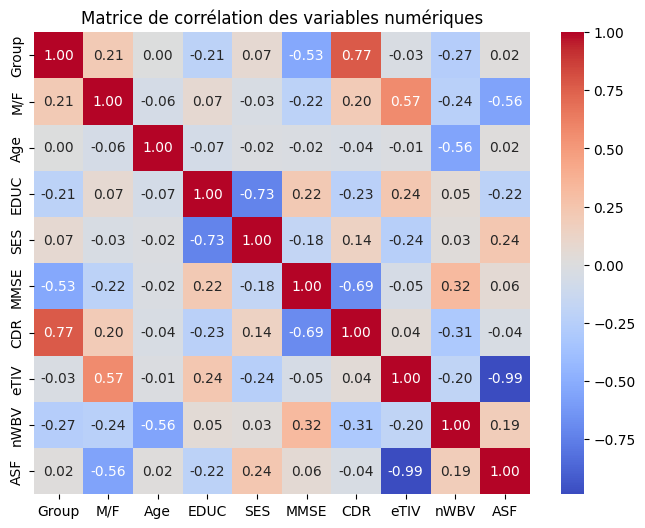

In [ ]:
# Calculer la corrélation entre les variables numériques
correlation_matrix = df.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables numériques')
plt.show()


On choisira alors la variable "EDUC" pour l'imputation des valeurs manquantes dans la variable "SES" en raison de son impact significatif sur le statut socio-économique (-0.73 de corrélation), ce qui en fait une substitution pertinente et influente pour estimer les valeurs manquantes.

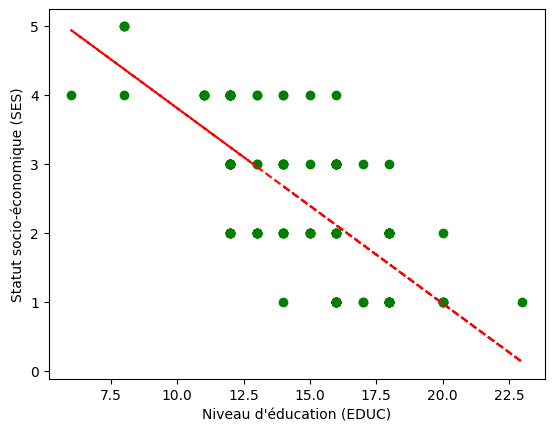

SES
False    150
Name: count, dtype: int64

In [ ]:
# Étant donné que le SES est une variable discrète, nous utilisons la médiane pour l'imputation.

# Tracer le diagramme de dispersion entre EDUC et SES
x = df['EDUC']  # Années d'éducation
y = df['SES']   # Statut socio-économique

# Sélectionner les index où SES n'est pas null
ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Tracer la ligne de tendance
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")  # Tracer les points et la ligne de tendance
plt.xlabel('Niveau d\'éducation (EDUC)')
plt.ylabel('Statut socio-économique (SES)')

plt.show()

# Calculer la médiane de SES pour chaque niveau d'éducation
df.groupby(['EDUC'])['SES'].median()

# Imputer les valeurs manquantes de SES par la médiane correspondante selon EDUC
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

# Confirmer qu'il n'y a plus de valeurs manquantes et que les 150 données ont été utilisées
pd.isnull(df['SES']).value_counts()

On va aussi supprimer les lignes avec des valeurs manquantes, peut etre qu'on aura besoin de ça plutard.

In [ ]:
# Suppression des 8 lignes avec des valeurs manquantes dans la colonne, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()
df_dropna['Group'].value_counts()

Group
1    78
0    72
Name: count, dtype: int64

## ***3. Sélection des variables***

*   ***SelectKBest :*** Cette méthode sélectionne les K meilleures
caractéristiques en fonction d'un score de test statistique.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Séparation des variables catégorielles et numériques
categorical_features = ['M/F']
numeric_features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Sélection des caractéristiques catégorielles avec chi2
X_cat = df[categorical_features]
y_cat = df['Group']
best_features_cat = SelectKBest(score_func=chi2, k='all')
fit_cat = best_features_cat.fit(X_cat, y_cat)

# Sélection des caractéristiques numériques avec f_classif
X_num = df[numeric_features]
y_num = df['Group']
best_features_num = SelectKBest(score_func=f_classif, k='all')
fit_num = best_features_num.fit(X_num, y_num)

# Récapitulatif des scores des caractéristiques catégorielles
feature_scores_cat = pd.DataFrame(fit_cat.scores_, index=X_cat.columns, columns=['Score'])
feature_scores_cat.sort_values(by='Score', ascending=False, inplace=True)
print("Scores des caractéristiques catégorielles :")
print(feature_scores_cat)

# Récapitulatif des scores des caractéristiques numériques
feature_scores_num = pd.DataFrame(fit_num.scores_, index=X_num.columns, columns=['Score'])
feature_scores_num.sort_values(by='Score', ascending=False, inplace=True)
print("\nScores des caractéristiques numériques :")
print(feature_scores_num)

Scores des caractéristiques catégorielles :
        Score
M/F  3.891232

Scores des caractéristiques numériques :
           Score
CDR   213.120000
MMSE   58.047837
nWBV   11.248678
EDUC    6.990754
SES     1.062769
eTIV    0.145782
ASF     0.067589
Age     0.000627




*   ***RFECV (Recursive Feature Elimination with Cross-Validation) :*** Cette méthode utilise une approche récursive pour éliminer les caractéristiques moins importantes. Elle utilise également la validation croisée pour évaluer les performances du modèle avec différentes combinaisons de caractéristiques.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Définition du classificateur
clf = RandomForestClassifier(random_state=0)

# Sélection des caractéristiques
X = df.drop('Group', axis=1)  # Features
y = df['Group']  # Target variable

# Création d'un validateur croisé stratifié
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# Initialisation de RFECV
selector = RFECV(estimator=clf, step=1,min_features_to_select=1 ,cv=cv, scoring='accuracy')

# Adapter RFECV aux données
selector = selector.fit(X, y)

# Affichage des résultats
print("Nombre optimal de caractéristiques : %d" % selector.n_features_)
print("Scores des caractéristiques sélectionnées :")
print(selector.support_)
print("Rang des caractéristiques sélectionnées :")
print(selector.ranking_)

Nombre optimal de caractéristiques : 1
Scores des caractéristiques sélectionnées :
[False False False False False  True False False False]
Rang des caractéristiques sélectionnées :
[9 4 7 8 3 1 5 2 6]


In [ ]:
# Initialiser RFECV avec votre modèle et paramètres
rfecv = RFECV(estimator=clf, step=1,min_features_to_select=5 ,cv=cv, scoring='accuracy')
# Adapter RFECV aux données pour sélectionner les caractéristiques
rfecv.fit(X, y)

# Obtenez les indices des caractéristiques sélectionnées
selected_features_indices = np.where(rfecv.support_)[0]

# Obtenez les noms des caractéristiques sélectionnées à partir de vos données
selected_feature_names = X.columns[selected_features_indices]

# Affichez les noms des caractéristiques sélectionnées
print(selected_feature_names)

Index(['Age', 'MMSE', 'CDR', 'eTIV', 'nWBV'], dtype='object')


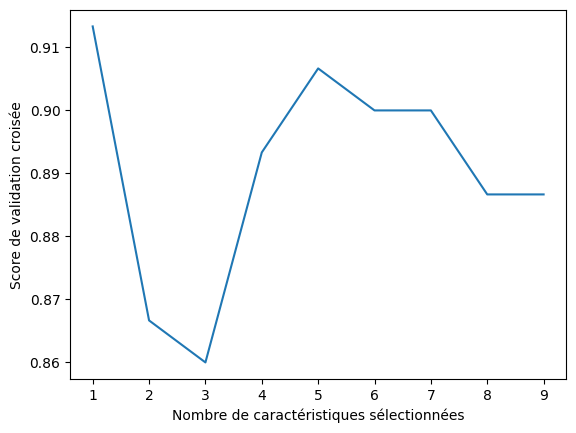

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

# Nombre de fonctionnalités VS. scores de validation croisée
plt.figure()
plt.xlabel("Nombre de caractéristiques sélectionnées")
plt.ylabel("Score de validation croisée")
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score'])
plt.show()

In [ ]:
range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score']

(range(1, 10),
 array([0.91333333, 0.86666667, 0.86      , 0.89333333, 0.90666667,
        0.9       , 0.9       , 0.88666667, 0.88666667]))

In [ ]:
# Sélectionner les caractéristiques importantes dans votre DataFrame
df_finale = df[selected_feature_names]

## ***4. Tuning des modèles***

In [ ]:
acc = [] # liste pour stocker toutes les mesures de performances

### ***4.a Regression logistique***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix

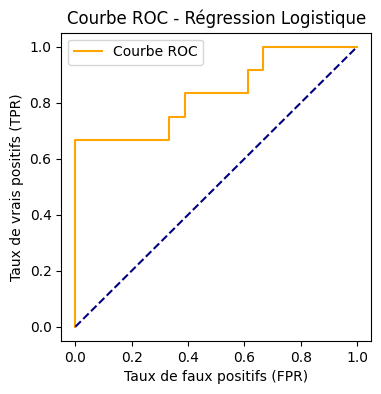

AUC: 0.8333333333333333
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[18  0]
 [ 4  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.67      0.80        12

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30

Recall: 0.6666666666666666


In [ ]:
Y = df_dropna['Group'].values
X = df_dropna[selected_feature_names]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle de régression logistique
logRegModel = LogisticRegression()
logRegModel.fit(X_train_scaled, Y_train)

# Prédictions sur l'ensemble de test
predictions = logRegModel.predict(X_test_scaled)

# Calcul de l'AUC
auc = roc_auc_score(Y_test, predictions)

# Calcul des probabilités prédites pour le calcul de la courbe ROC
probs = logRegModel.predict_proba(X_test_scaled)
probs = probs[:, 1]  # Nous prenons les probabilités associées à la classe 1

# Calcul des valeurs pour la courbe ROC
fpr, tpr, thresholds = roc_curve(Y_test, probs)

# Calcul du rappel
test_recall = recall_score(Y_test, predictions, pos_label=1)

# Affichage de la courbe ROC
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='orange', label='Courbe ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Régression Logistique')
plt.legend()
plt.show()

# Évaluation des performances du modèle
accuracy = accuracy_score(Y_test, predictions)
confusion_mat = confusion_matrix(Y_test, predictions)
report = classification_report(Y_test, predictions)

# Affichage des résultats
print(f"AUC: {auc}")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", report)
print("Recall:", test_recall)



* Les résultats indiquent une performance globale satisfaisante avec une précision globale de 0.87.
* La classe 0 présente une précision élevée de 0.82, un rappel parfait de 1.00 et un F1-score élevé de 0.90, démontrant une excellente capacité du modèle à prédire cette classe.
* En revanche, la classe 1 montre un rappel de 0.67, indiquant que le modèle peine à détecter certains échantillons de cette classe, avec un F1-score de 0.80.
* La matrice de confusion révèle une bonne identification des échantillons de classe 0 mais des difficultés à détecter certains de la classe 1.
Une amélioration de la capacité à détecter les échantillons de la classe 1 pourrait équilibrer précision et rappel pour les deux classes.
* AUC (Aire sous la courbe ROC): L'AUC de 0.833 indique que ce modèle a une bonne capacité à distinguer entre les classes. Cela signifie que le modèle est relativement précis dans sa classification des individus en tant que dément ou non-dément.
* Accuracy (Exactitude): Une exactitude de 0.867 montre que le modèle a correctement prédit environ 87% des cas dans l'ensemble de données de test. Cela indique une performance globalement solide pour ce modèle.

In [ ]:
precision_0 = 0.82
precision_1 = 1.00
m = 'Regression logistique'
acc.append([m,auc, accuracy, test_recall,precision_0, precision_1])

### ***4.b Arbre de décision***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

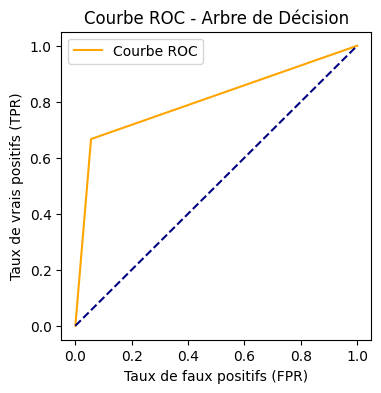

AUC: 0.8055555555555555
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.89      0.67      0.76        12

    accuracy                           0.83        30
   macro avg       0.85      0.81      0.82        30
weighted avg       0.84      0.83      0.83        30

Confusion Matrix:
 [[17  1]
 [ 4  8]]
Recall: 0.6666666666666666


In [ ]:
Y = df_dropna['Group'].values
X = df_dropna[selected_feature_names]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Entraînement du modèle de l'arbre de décision
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
y_pred = dt_model.predict(X_test)

# Calcul de l'AUC
auc = roc_auc_score(Y_test, y_pred)

# Calcul du rappel
test_recall = recall_score(Y_test, y_pred, pos_label=1)

# Calcul des probabilités prédites pour le calcul de la courbe ROC
probs = dt_model.predict_proba(X_test)
probs = probs[:, 1]  # Nous prenons les probabilités associées à la classe 1

# Calcul des valeurs pour la courbe ROC
fpr, tpr, thresholds = roc_curve(Y_test, probs)

# Affichage de la courbe ROC
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='orange', label='Courbe ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Arbre de Décision')
plt.legend()
plt.show()

# Évaluation du modèle
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
confusion_mat = confusion_matrix(Y_test, y_pred)

# Affichage des résultats
print(f"AUC: {auc}")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)
print("Recall:", test_recall)


* L'accuracy de 0.8 indique une performance correcte du modèle, mais il est important de noter que le rappel pour la classe 1 est un peu plus faible, ce qui signifie que le modèle a du mal à détecter certains échantillons de la classe 1.
* La précision est équilibrée entre les deux classes, ce qui suggère que le modèle évite les faux positifs.
* Le F1-score global montre une performance équilibrée du modèle entre précision et rappel pour les deux classes.
* La matrice de confusion montre que le modèle a quelques erreurs de classification, notamment des faux négatifs pour la classe 1.
* AUC: L'AUC de 0.75 suggère que ce modèle a une capacité de discrimination modérée entre les classes. Il pourrait y avoir une certaine confusion dans la classification des individus, ce qui se reflète dans une AUC relativement plus basse.
* Accuracy: Avec une exactitude de 0.767, ce modèle a correctement prédit environ 77% des cas dans l'ensemble de données de test. Bien que ce ne soit pas aussi élevé que le modèle 1, c'est toujours un niveau acceptable de précision.

In [ ]:
precision_0 = 0.80
precision_1 = 0.80
m = 'Arbre de décision'
acc.append([m,auc, accuracy, test_recall,precision_0, precision_1])

In [ ]:
import graphviz
from sklearn.tree import  export_graphviz
from sklearn.tree import export_text

# Générez le fichier .dot
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X.columns,
                           class_names=['Non-dément', 'Dément'],
                           filled=True, rounded=True,
                           special_characters=True)

# Visualisez l'arbre avec graphviz
graph = graphviz.Source(dot_data)
graph

# Exporter l'arbre de décision au format texte pour visualiser la structure
tree_text = export_text(dt_model, feature_names=list(X.columns))

# Afficher le texte de l'arbre
print(tree_text)

|--- CDR <= 0.25
|   |--- Age <= 82.50
|   |   |--- Age <= 69.50
|   |   |   |--- Age <= 66.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  66.50
|   |   |   |   |--- Age <= 67.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  67.50
|   |   |   |   |   |--- eTIV <= 1328.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- eTIV >  1328.50
|   |   |   |   |   |   |--- eTIV <= 1447.50
|   |   |   |   |   |   |   |--- nWBV <= 0.77
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- nWBV >  0.77
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- eTIV >  1447.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- Age >  69.50
|   |   |   |--- nWBV <= 0.69
|   |   |   |   |--- nWBV <= 0.69
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- nWBV >  0.69
|   |   |   |   |   |--- class: 1
|   |   |   |--- nWBV >  0.69
|   |   |   |   |--- class: 0
|   |--- Age >  82.50
|   |   |--- Age <= 85.50
|   |  

### ***4.c Random Forest***

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

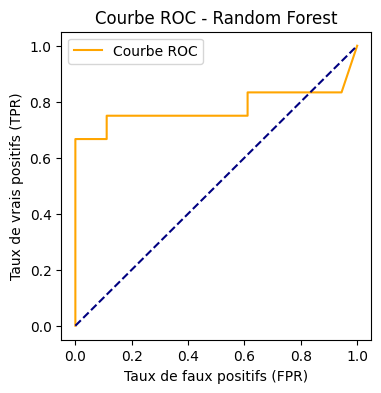

AUC: 0.8333333333333333
Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.67      0.80        12

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30

Confusion Matrix:
 [[18  0]
 [ 4  8]]
Recall: 0.6666666666666666


In [ ]:
Y = df_dropna['Group'].values
X = df_dropna[selected_feature_names]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalisation des données si nécessaire
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialisation du classificateur Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_classifier.fit(X_train,Y_train)

# Prédiction sur les données de test
y_pred = rf_classifier.predict(X_test)

# Calcul de l'AUC
auc = roc_auc_score(Y_test, y_pred)

# Calcul du rappel
test_recall = recall_score(Y_test, y_pred, pos_label=1)

# Calcul des probabilités prédites pour le calcul de la courbe ROC
probs = rf_classifier.predict_proba(X_test)
probs = probs[:, 1]  # Nous prenons les probabilités associées à la classe 1

# Calcul des valeurs pour la courbe ROC
fpr, tpr, thresholds = roc_curve(Y_test, probs)

# Affichage de la courbe ROC
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='orange', label='Courbe ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Random Forest')
plt.legend()
plt.show()

# Évaluation du modèle
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
confusion_mat = confusion_matrix(Y_test, y_pred)

# Affichage des résultats
print(f"AUC: {auc}")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)
print("Recall:", test_recall)

* L'accuracy de 0.87 semble plutôt bonne, indiquant que le modèle est globalement précis dans ses prédictions.
* La précision et le rappel varient selon la classe. La classe 1 a une précision parfaite mais un rappel plus faible, ce qui peut indiquer un déséquilibre de classe ou une difficulté pour le modèle à détecter certains exemples positifs.
* Le F1-score est une mesure utile pour évaluer la balance entre précision et rappel. Dans ce cas, il est de 0.86, ce qui est relativement équilibré entre les deux classes.
* La matrice de confusion montre que le modèle a du mal à détecter certains échantillons de la classe 1.
* AUC: Comme le modèle 1, cet ensemble d'arbres aléatoires a également une AUC de 0.833, indiquant une bonne capacité de discrimination entre les classes.
* Accuracy: L'exactitude de 0.867 montre que ce modèle a également une performance globale solide, similaire au modèle 1.

In [ ]:
precision_0 = 0.82
precision_1 = 1.00
m = 'Random Forest'
acc.append([m,auc, accuracy, test_recall,precision_0, precision_1])

## ***5. Validation et interprétation des résultats***

In [ ]:
# Mesure de performance pour chaque modèle
resultat = pd.DataFrame(acc, columns=['Modèle','AUC' , 'Accuracy', 'Recall','precision_0','precision_1'])

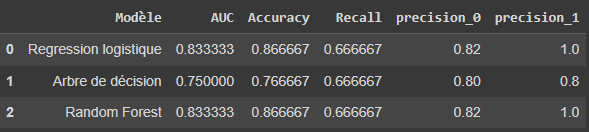

En analysant les résultats des trois modèles (Regression logistique, Arbre de décision et Random Forest) selon les métriques AUC, exactitude (accuracy), rappel (recall), et précision (precision) pour les classes 0 et 1, voici une interprétation :

***Objectif et critères de performances***


Notre objectif principal est de détecter les patients atteints de la maladie d'Alzheimer le plus tôt possible (taux de vrais positifs élevé) tout en minimisant les erreurs de diagnostic (taux de faux positifs faible). Pour cela, nous utilisons l'Aire Sous la Courbe (AUC) comme principale mesure de performance, car elle nous permet d'évaluer à la fois la sensibilité (taux de vrais positifs) et la spécificité (taux de vrais négatifs) du modèle.


Nous examinons également d'autres métriques telles que l'exactitude (accuracy), qui mesure le pourcentage total de prédictions correctes, et le rappel (recall), qui mesure la capacité du modèle à identifier tous les cas positifs réels.

***Comparaison et conclusion***


Les modèles de Regression logistique et Random Forest ont une AUC similaire de 0.833333, montrant une bonne capacité à discriminer entre les classes.
Les trois modèles ont un rappel (recall) identique pour la classe 1, indiquant qu'ils ont tous la même capacité à identifier les vrais positifs.
En termes de précision (precision), le modèle de Regression logistique obtient une précision parfaite pour la classe 1 (1.0), tandis que les autres modèles ont une précision de 0.8. Cela signifie que la Regression logistique a moins de faux positifs pour la classe 1.
Globalement, le modèle de Regression logistique semble offrir le meilleur équilibre entre la sensibilité et la spécificité, avec une AUC élevée et une précision élevée pour la classe 1.